# __Que es la Validacion Cruzada?__

Es una tecnica utilizada para evaluar el rendimiento de un modelo de manera mas confiable. Su objetivo es evitar problemas de sobreajuste o subajuste y garantizar que el modelo generalice bien los datos no vistos.

En lo que sigue vamos a desarrollar algunos de los tipos de Validacion Cruzada mas usados.

## _1. Validacion Cruzada Simple (Cross Validation)_

Es la técnica mas sencilla para evaluar la capacidad de generalización de un modelo de aprendizaje automático. Consiste en dividir el conjunto de datos en dos partes, donde en cada iteración se entrena el modelo con una parte y se evalúa con otra. Generalmente la proporcion de la division es:

Entrenamiento - Prueba
- 80%          - 20% 
- 70%          - 30%
- 75%          - 25%

Despues de entrenar el modelo en el conjunto de entrenamiento, se evalua su desempeno utilizando los datos de prueba que no participaron en el entrenamiento.

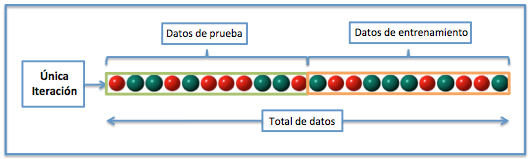

__Ventajas__

- Facil de implementar y entender.
- Requiere menos tiempo computacional.
- Proporciona una evaluacion justa ya que los datos de prueba no intervienen en el entrenamiento.

__Desventajas__

- El rendimiento puede variar dependiendo de como se dividan los datos. Si los datos no estan bien distribuidos (clases desbalanceadas), la evaluacion puede ser sesgada.

- Solo utiliza una parte de los datos para el entrenamiento, lo que limita la capacidad del modelo de aprender patrones robustos

- Proporciona una unica estimacion del rendimiento, que puede no reflejar el desempeno real en datos no vistos.

__Recomendaciones__

- Es adecuada cuando los datos son limitados y no se requiere una evaluacion compleja.

- Ideal cuando se buscan resultados rapidos, pero no es la mejor opcion cuando se requiere una evaluacion mas confiable o para evitar el sobreajuste en modelos complejos.

## _2. Validacion Cruzada K-Folds_

Es una técnica donde se divide el conjunto de datos en $k$ particiones (o $folds$). En cada iteración, $k-1$ partes se usan para entrenar el modelo y la restante para validarlo. Esto se repite $k$ veces. Es especialmente util para medir  el rendimiento de un modelo y asegurarse de que generalice bien en datos no vistos.

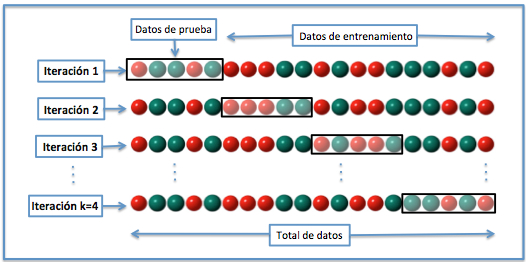


**Ventajas** 

- Utiliza una porción mayor de datos para entrenamiento y validación en comparación con el $simple$ (simple división en entrenamiento/validación).

- Proporciona una evaluacion mas robusta al reducir la dependencia de una sola division de datos.

- Su capacidad de generalizacion es mejor gracias a que el modelo se prueba con diferentes subconjuntos.

- Util cuando no hay uficientes datos para separar un conjunto grande de prueba.

**Desventajas** 

- Similar a la validación cruzada simple, aumenta el costo computacional.

- Si los datos no son homogeneos, la division en folds puede no reflejar bien la variabilidad del conjunto completo.

- No es apropiada en datos secuenciales ya que rompe el orden temporal.

**Recomendaciones** 

- Para conjuntos pequenos, valores altos como $k = 10$ son mejores para reducir el sesgo.

- Para conjuntos grandes, $k = 5$ puede ser suficiente y mas eficiente computacionalmente.

- Util para datos desbalanceados, ya que asegura que la proporcion de clases sea consistente en cada fold.


## _3. Validacion Cruzada aleatoria K-Folds_

Es una variante de la Validacion Cruzada K-Folds que selecciona de forma aleatoria las particiones de cada iteracion. En este metodos las divisiones de los $k$ subconjuntos son aleatorias y pueden repetirse varias veces con dierentes particiones. Mejora la robustez de las evaluaciones al introducir aleatoriedad y diversidad en las particiones.

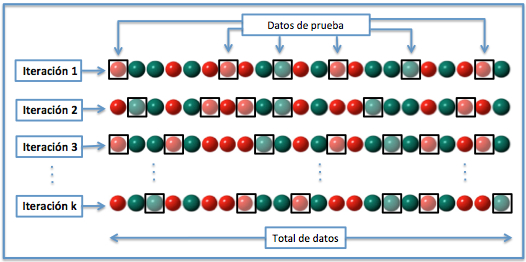

__Ventajas__

- Cada iteracion usa particiones diferentes, reduciendo la influencia de una unica division fija en los resultados.

- Al repetir el proceso con multiples combinaciones, las metricas finales son mas confiables y estables.

- Evita problemas de sesgos derivados de datos desbalanceados.

- Es muy util cuando los datos son limitados ya que maximiza su uso.


__Desventajas__

- Generar multiples particiones y entrenar el modelo repetidamente requiere de mayor costo computacional.

- Algunas muestras pueden ser seleccionadas varias veces en diferentes folds, lo que introduce redundancia en el analisis.

- Para grandes cantidades de datos, el almacenamiento y procesamiento pueden ser impracticables.

__Recomendaciones__

- Utiliza entre 5 y 10 folds para lograr un balance entre tiempo y precision.

- Usa particiones estratificadas en problemas de clasificacion para asegurar que las proporciones sean consistentes en cada fold.

- Es ideal para comparar y evaluar modelos diferentes ya que proporciona resultados mas representativos.

## _4. Validación Cruzada dejando uno fuera_ (Leave-one-out cross-validation)(LOOCV)

Es un metodo de evaluacion donde solo se utiliza una sola muestra del conjunto de datos como conjunto de prueba, y el resto de los datos como conjunto de entrenamiento. Este proceso se repite tantas veces como muestras hayan, asegurando que cada dato sea utilizado como prueba exactamente una vez.

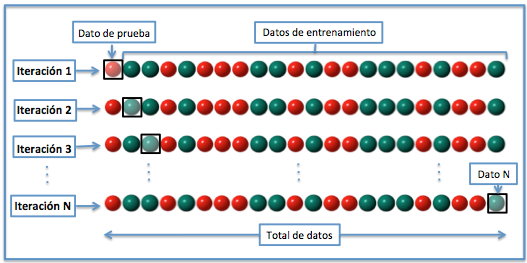

__Ventajas__

- Utiliza la mayor cantidad de datos posibles para el entrenamiento en cada iteracion, maximizando el uso de los datos.

- El metodo es determinista ya que siempre produce el mismo resultado para un conjunto de datos dado.

- Es muy util cuando el conjunto de datos es muy pequeno, pues minimiza la perdida de informacion.

__Desventajas__

- Si el conjunto de datos tiene N muestras, el modelo debe entrenarse N veces lo que puede ser muy costoso computacionalmente.

- Como las predicciones dependen en exceso de una unica muestra, se presenta un alto riesgo al sobreajuste.

- No proporciona una vision de como varia el modelo con diferentes particiones de datos.

__Recomendaciones__

- Es ideal para cojuntos de datos de menos de 1000 muestras.

- Es mas adecuado para modelos rapidos de entrenar como de regresion lineal, debido al costo computacional.

- Garantiza que los datos esten bien distribuidos para evitar sesgos.

Imágenes tomadas de: https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

## _5. K-folds Estratificado (Stratified K-fold Cross-Validation)_

Es una variante de la validación cruzada $k-fold$ donde se asegura que cada $fold$ tiene aproximadamente la misma proporción de clases que el conjunto de datos original. Esto es especialmente útil en conjuntos de datos desequilibrados.


**Ventajas** 
- Grarantiza que las clases no se excluyan de ningun fold, mejorando la representatividad de los datos.

- Al tener una distribucion similar de clases en cada fold, las metricas son mas consistentes.

- Reduce la variabilidad en los resultados que pueden surgir por divisiones no representativas de los datos.

- Mejora la evaluacion de modelos en conjuntos de datos donde algunas clases tienen menos ejemplos.


**Desventajas** 

- Puede aumentar el costo computacional de implementación. 

- Requiere mas calculo en la preparacion de los folds.

- Si hay muy pocos datos de una clase, es posible que la estratificacion no sea suficiente para lograr una evaluacion precisa.


**Recomendaciones** 

- Usar en problemas de clasificación, especialmente si el conjunto de datos es desequilibrado.

- Si el dataset es pequeno, usar demasiados folds ($K>10$) podria no garantizar suficiente representatividad de las clases en cada fold.

# __Ejemplo Practico__

Vamos a trabajar con los datos de plantas de diferente especies conocida como _iris_.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

Representamos los datos en un dataframe.

In [2]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Una vez cargado el dataframe, separamos las caracteristicas de la etiqueta.

In [3]:
X, y = df.iloc[:,:4], df.iloc[:,4]

In [4]:
# caracteristicas
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# etiquetas
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Vamos a codificar las etiquetas convirtiendolas en vectores OHE. Como vemos, hay tres tipos de clases o especies de planta lo que indica que la salida es multiclase.

0: [0 0 1]

1: [0 1 0]

2: [1 0 0]

In [6]:
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas
y_cat = to_categorical(y, num_classes=3)
y_cat[:5]

2024-12-13 08:33:36.491396: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 08:33:36.947318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-13 08:33:36.947392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-13 08:33:37.030371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 08:33:37.207854: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 08:33:37.211574: I tensorflow/core/platform/cpu_feature_guard.cc:1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# **1. Validacion Cruzada Simple**

Primero, vamos a importar las librerias requeridas para dividir los datos y crear un modelo de red neuronal simple MLP.

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Creamos una funcion para generar un modelo de red neuronal MLP configurado para un problema de clasificacion multiclase. 

La arquitectura consiste de una capa oculta de 8 neuronas con funcion de activacion ReLU y una capa de salida de 3 neuronas que corresponde a la cantidad de salidas con funcion de activacion Sotfmax.

Ademas, utiliza como funcion de perdida _categorical_crossentropy_, como optimizador _adam_ y metrica _accuracy_.

In [13]:
# Función para crear el modelo de red neuronal
def create_model():
    model = Sequential()
    model.add(Input(shape=(4,)))  # Capa de entrada usando Input
    model.add(Dense(8, activation='relu'))  # Capa oculta
    model.add(Dense(3, activation='softmax'))  # Capa de salida
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Dividimos los datos en entrenamiento y prueba. Un 80% para entrenamiento y un 20% para prueba

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_cat, 
    test_size=0.2, 
    random_state=127
)


Instanciamos el modelo, lo entrenamos con los datos de entrenamiento, lo evaluamos con los datos de prueba y finalmente mostramos los resultados.

In [15]:
# Crear el modelo
model = create_model()

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Mostrar los resultados
print(f"Precisión en el conjunto de prueba: {accuracy}")


Precisión en el conjunto de prueba: 0.9666666388511658


#### Pero ¿Cuáles fueron las muestras con que entrenó (train) y cuáles con las que hizo las pruebas (test)?

In [8]:
# Muestras de entrenamiento
X_train.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
148,6.2,3.4,5.4,2.3
118,7.7,2.6,6.9,2.3
85,6.0,3.4,4.5,1.6
96,5.7,2.9,4.2,1.3
133,6.3,2.8,5.1,1.5
127,6.1,3.0,4.9,1.8
86,6.7,3.1,4.7,1.5
5,5.4,3.9,1.7,0.4
2,4.7,3.2,1.3,0.2


In [9]:
# muestras de prueba
X_test.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
143,6.8,3.2,5.9,2.3
95,5.7,3.0,4.2,1.2
30,4.8,3.1,1.6,0.2
10,5.4,3.7,1.5,0.2
113,5.7,2.5,5.0,2.0
54,6.5,2.8,4.6,1.5
1,4.9,3.0,1.4,0.2
76,6.8,2.8,4.8,1.4
75,6.6,3.0,4.4,1.4
78,6.0,2.9,4.5,1.5


# **2. K-folds Cross Validation**

In [10]:
from sklearn.model_selection import KFold
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Definir la arquitectura del modelo
def create_model():
    model = Sequential()
    model.add(Input(shape=(4,)))  # Capa de entrada usando Input
    model.add(Dense(8, activation='relu'))  # Capa oculta
    model.add(Dense(3, activation='softmax'))  # Capa de salida
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Realizar validación cruzada manualmente con KFold
kf = KFold(n_splits=5, shuffle=True)
fold = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

    # Se imprimen las muestras de train y test por cada fold
    print('\nMuestras de entrenamiento para cada fold')
    print(f'Class 1: {pd.DataFrame(y_train)[0].sum()} - Class 2: {pd.DataFrame(y_train)[1].sum()} - Class 3: {pd.DataFrame(y_train)[2].sum()}')
    # print(X_train.head(10))
    # print(X_test.head(10))

    # Crear y entrenar el modelo para cada fold
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Evaluar el modelo en el fold actual
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold}, Accuracy: {accuracy}")
    fold += 1



Muestras de entrenamiento para cada fold
Class 1: 44.0 - Class 2: 38.0 - Class 3: 38.0
Fold 1, Accuracy: 0.9666666388511658

Muestras de entrenamiento para cada fold
Class 1: 33.0 - Class 2: 42.0 - Class 3: 45.0
Fold 2, Accuracy: 0.800000011920929

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 38.0 - Class 3: 42.0
Fold 3, Accuracy: 0.6000000238418579

Muestras de entrenamiento para cada fold
Class 1: 43.0 - Class 2: 40.0 - Class 3: 37.0
Fold 4, Accuracy: 0.8999999761581421

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 42.0 - Class 3: 38.0
Fold 5, Accuracy: 0.7666666507720947


# **3. Stratified K-folds Cross Validation**

In [11]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(Input(shape=(4,)))  # Capa de entrada usando Input
    model.add(Dense(8, activation='relu'))  # Capa oculta
    model.add(Dense(3, activation='softmax'))  # Capa de salida
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

fold = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

    print('\nMuestras de entrenamiento para cada fold')
    print(f'Class 1: {pd.DataFrame(y_train)[0].sum()} - Class 2: {pd.DataFrame(y_train)[1].sum()} - Class 3: {pd.DataFrame(y_train)[2].sum()}')

    # Crear y entrenar el modelo para cada fold
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Evaluar el modelo en el fold actual
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold}, Accuracy: {accuracy}")
    fold += 1



Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 40.0 - Class 3: 40.0
Fold 1, Accuracy: 0.9333333373069763

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 40.0 - Class 3: 40.0
Fold 2, Accuracy: 0.7333333492279053

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 40.0 - Class 3: 40.0
Fold 3, Accuracy: 0.699999988079071

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 40.0 - Class 3: 40.0
Fold 4, Accuracy: 0.7666666507720947

Muestras de entrenamiento para cada fold
Class 1: 40.0 - Class 2: 40.0 - Class 3: 40.0
Fold 5, Accuracy: 1.0
